In [4]:
print("2. Visualize the sentiment distribution (positive, neutral, negative) of user reviews using a stacked bar chart, segmented by rating groups (e.g., 1-2 stars, 3-4 stars, 4-5 stars). Include only apps with more than 1,000 reviews and group by the top 5 categories.")

2. Visualize the sentiment distribution (positive, neutral, negative) of user reviews using a stacked bar chart, segmented by rating groups (e.g., 1-2 stars, 3-4 stars, 4-5 stars). Include only apps with more than 1,000 reviews and group by the top 5 categories.


In [5]:
import pandas as pd

# Load the dataset from a CSV file (replace 'your_data.csv' with your actual file path)
df = pd.read_csv('data22.csv')

# Make sure the CSV file contains the following columns: 'APP', 'Installs', 'Price', 'Revenue', 'Category', 'Rating', 'Review count', 'Sentiment'
df.head(50)

,App,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Installs,Price,Revenue,Category,Unnamed: 9,Rating,Review count,Unnamed: 12,Sentiment,Unnamed: 14,Size,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,NaN,NaN,NaN,NaN,10000.0,10.0,0.0,ART_AND_DESIGN,NaN,4.1,159.0,NaN,Positive,NaN,14M,2024-10-22 23:33:00
1,Coloring book moana,NaN,NaN,NaN,NaN,500000.0,11.0,1.0,ART_AND_DESIGN,NaN,3.9,967.0,NaN,Positive,NaN,8.7M,2024-10-22 20:59:00
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",NaN,NaN,NaN,NaN,5000000.0,12.0,2.0,ART_AND_DESIGN,NaN,4.7,87510.0,NaN,NaN,NaN,25M,2024-10-22 14:10:00
3,Sketch - Draw & Paint,NaN,NaN,NaN,NaN,50000000.0,13.0,3.0,ART_AND_DESIGN,NaN,4.5,215644.0,NaN,Positive,NaN,2.8M,2024-10-22 20:07:00
4,Pixel Draw - Number Art Coloring Book,NaN,NaN,NaN,NaN,100000.0,14.0,4.0,ART_AND_DESIGN,NaN,4.3,967.0,NaN,Positive,NaN,5.6M,2024-10-22 11:10:00
5,Paper flowers instructions,NaN,NaN,NaN,NaN,50000.0,15.0,5.0,ART_AND_DESIGN,NaN,4.4,167.0,NaN,Positive,NaN,19M,2024-10-22 06:09:00
6,Smoke Effect Photo Maker - Smoke Editor,NaN,NaN,NaN,NaN,50000.0,16.0,6.0,ART_AND_DESIGN,NaN,3.8,178.0,NaN,Positive,NaN,29M,2024-10-22 22:39:00
7,Infinite Painter,NaN,NaN,NaN,NaN,1000000.0,17.0,7.0,ART_AND_DESIGN,NaN,4.1,36815.0,NaN,NaN,NaN,33M,2024-10-22 11:31:00
8,Garden Coloring Book,NaN,NaN,NaN,NaN,1000000.0,18.0,8.0,ART_AND_DESIGN,NaN,4.4,13791.0,NaN,Neutral,NaN,3.1M,2024-10-22 11:25:00
9,Kids Paint Free - Drawing Fun,NaN,NaN,NaN,NaN,10000.0,19.0,9.0,ART_AND_DESIGN,NaN,4.7,121.0,NaN,Neutral,NaN,28M,2024-10-22 17:04:00


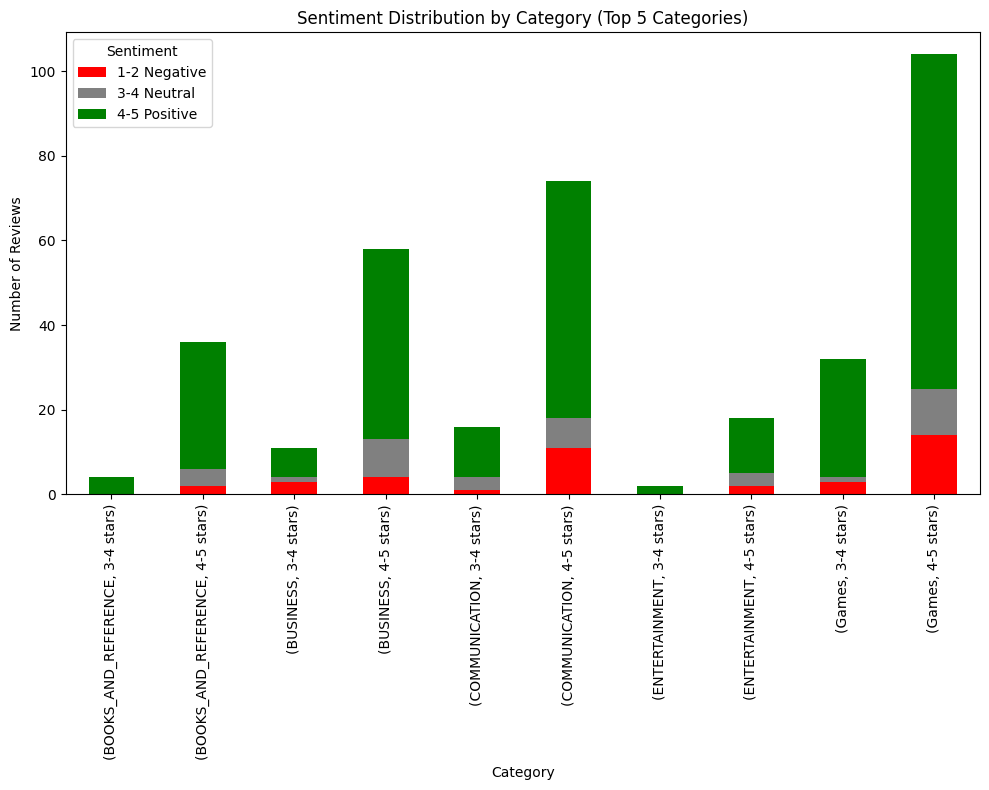

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data (replace with your actual DataFrame)
# Assuming `df` is the DataFrame with the following columns:
# 'APP', 'Installs', 'Price', 'Revenue', 'Category', 'Rating', 'Review count', 'Sentiment'

# Convert 'Review count' to numeric, forcing any non-numeric values to NaN (optional based on data)
df['Review count'] = pd.to_numeric(df['Review count'], errors='coerce')

# Drop any rows where 'Review count' is NaN (optional step)
df = df.dropna(subset=['Review count'])

# Convert 'Review count' to integer
df['Review count'] = df['Review count'].astype(int)

# Filter apps with more than 1000 reviews
filtered_df = df[df['Review count'] > 1000]

# Select the top 5 categories based on the number of installs
top_categories = filtered_df.groupby('Category')['Installs'].sum().nlargest(5).index
top_category_data = filtered_df[filtered_df['Category'].isin(top_categories)].copy()

# Grouping by rating ranges
def categorize_rating(rating):
    if rating <= 2:
        return '1-2 stars'
    elif 3 <= rating <= 4:
        return '3-4 stars'
    else:
        return '4-5 stars'

# Use .loc to safely assign values without warnings
top_category_data.loc[:, 'Rating Group'] = top_category_data['Rating'].apply(categorize_rating)

# Map sentiments if they are in numeric form or string
def map_sentiment(sentiment):
    if isinstance(sentiment, str):
        if sentiment.lower() == "positive":
            return 3
        elif sentiment.lower() == "neutral":
            return 2
        elif sentiment.lower() == "negative":
            return 1
    return sentiment  # Return numeric value as-is

# Apply the mapping to the sentiment column
top_category_data['Sentiment'] = top_category_data['Sentiment'].apply(map_sentiment)

# Count sentiment distribution for each rating group in each category
sentiment_counts = top_category_data.groupby(['Category', 'Rating Group', 'Sentiment']).size().unstack(fill_value=0)

# Ensure all sentiment groups (1 = Negative, 2 = Neutral, 3 = Positive) exist
sentiment_counts = sentiment_counts.reindex(columns=[1, 2, 3], fill_value=0)

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))
# Plot each sentiment (1 = Negative, 2 = Neutral, 3 = Positive) as a stacked bar
sentiment_counts.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'], ax=ax)

# Adding labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Number of Reviews')
ax.set_title('Sentiment Distribution by Category (Top 5 Categories)')

plt.legend(['1-2 Negative','3-4 Neutral', '4-5 Positive'], title='Sentiment')

plt.tight_layout()
plt.show()
